# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: reski nopriandi
- Email: reskinopriandi@gmail.com
- Id Dicoding:reskinopriandi03

Jaya Jaya Institute ingin memprediksi siswa berisiko dropout agar bisa dilakukan intervensi lebih awal. Proyek ini mencakup eksplorasi data, pembuatan model prediksi, dan evaluasi performanya.

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib


### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv', sep=';')

df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

## Data Understanding

Di tahap ini, kita akan:
1. Memeriksa struktur dataset dengan menampilkan lima baris pertama.
2. Mengecek informasi dasar seperti jumlah baris, kolom, tipe data, dan missing values.
3. Melihat statistik deskriptif dari fitur-fitur yang ada.
4. Melakukan visualisasi awal, khususnya pada kolom target `Status`.

In [3]:
# Menampilkan 5 baris awal dataset
display(df.head())
print("Jumlah baris dan kolom:", df.shape)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Jumlah baris dan kolom: (4424, 37)


In [4]:
# Tampilkan statistik deskriptif
display(df.describe())

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
#cek missing value
display(df.isnull().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


C:\Users\User\AppData\Local\Temp\ipykernel_7960\2008014132.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Status', palette='pastel')


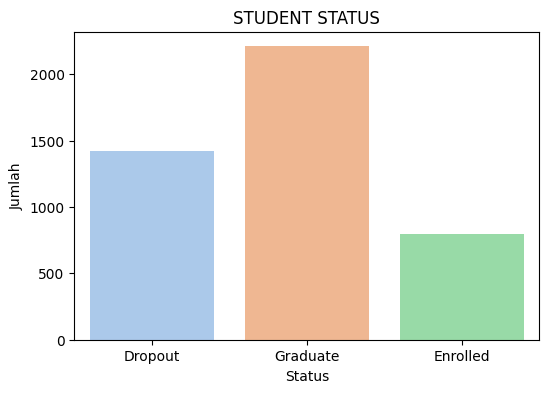

Total Data: 4424
Jumlah Graduate: 2209
Jumlah Dropout: 1421
Jumlah Enrolled: 794


In [6]:
# Visualisasi distribusi target variable 'Status'
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Status', palette='pastel')
plt.title("STUDENT STATUS")
plt.xlabel("Status")
plt.ylabel("Jumlah")

plt.show()

# Menghitung jumlah setiap kategori pada kolom 'Status' menggunakan value_counts()
status_counts = df['Status'].value_counts()
total_students = status_counts.sum()

print("Total Data:", total_students)
for status, count in status_counts.items():
    print(f"Jumlah {status}: {count}")


In [7]:
# Mengelompokkan data berdasarkan 'Course' dan menghitung frekuensi masing-masing 'Status'
course_status = df.groupby('Course')['Status'].value_counts().unstack(fill_value=0)

# Menampilkan tabel hasil
print("Distribusi Status per Program Studi/Kursus:")
print(course_status)


Distribusi Status per Program Studi/Kursus:
Status  Dropout  Enrolled  Graduate
Course                             
33            8         3         1
171          82        37        96
8014         71        21       123
9003         86        37        87
9070         51        42       133
9085         90        75       172
9119         92        64        14
9130         78        21        42
9147        134       108       138
9238         65        42       248
9254         96        41       115
9500        118       100       548
9556         33        17        36
9670         95        48       125
9773        101        34       196
9853         85        50        57
9991        136        54        78


Status,Dropout,Enrolled,Graduate
Course,,,
33 - Biofuel Production Technologies,8,3,1
171 - Animation and Multimedia Design,82,37,96
8014 - Social Service (evening attendance),71,21,123
9003 - Agronomy,86,37,87
9070 - Communication Design,51,42,133
9085 - Veterinary Nursing,90,75,172
9119 - Informatics Engineering,92,64,14
9130 - Equinculture,78,21,42
9147 - Management,134,108,138


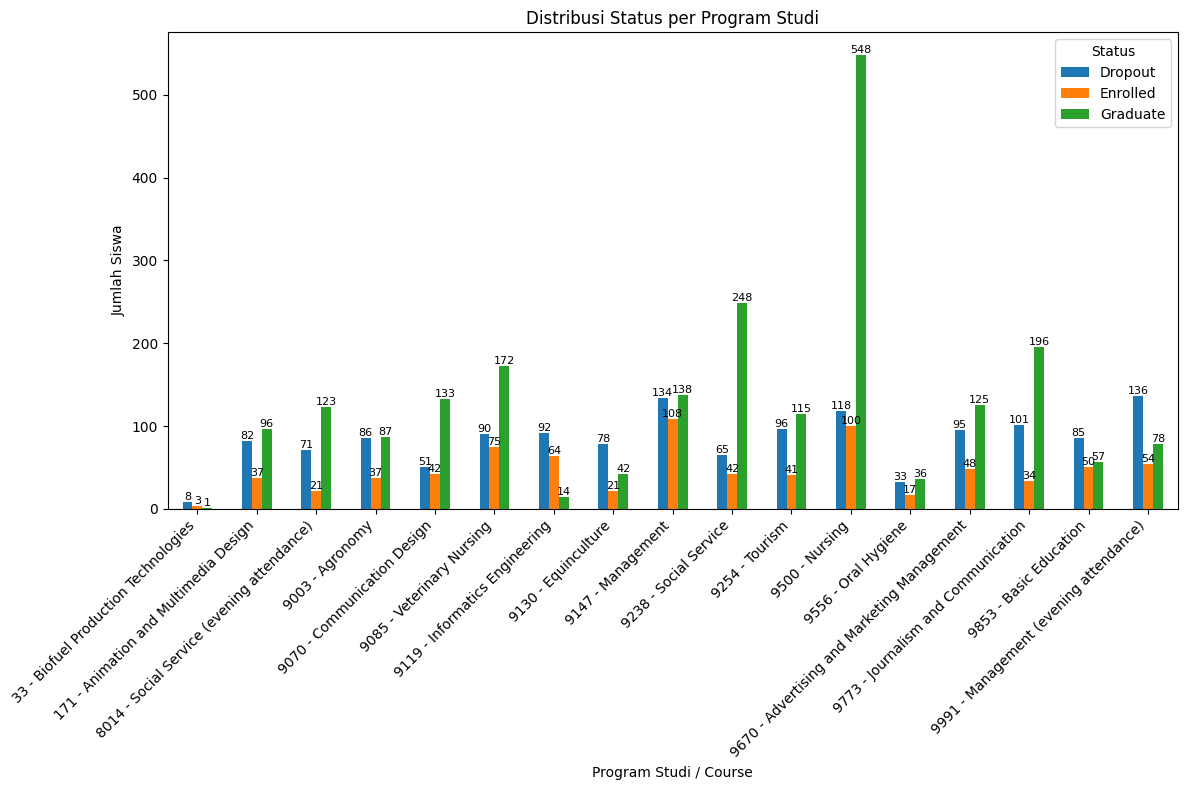

In [8]:
# Mapping dictionary: kode program ke nama jurusan
course_names = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}

# Buat pivot table: kelompokkan data berdasarkan 'Course' dan hitung jumlah status (Graduate, Enrolled, Dropout)
course_status = df.groupby('Course')['Status'].value_counts().unstack(fill_value=0)

# Ubah index (kode Course) menjadi string yang mencakup kode dan nama jurusan
course_status.index = course_status.index.map(lambda x: f"{x} - {course_names.get(x, 'Unknown Course')}")

# Tampilkan pivot table sebagai referensi
display(course_status)

# Buat diagram batang (bar chart)
ax = course_status.plot(kind='bar', figsize=(12,8))
plt.title("Distribusi Status per Program Studi")
plt.xlabel("Program Studi / Course")
plt.ylabel("Jumlah Siswa")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()

# Tambahkan angka di atas setiap batang sebagai annotasi
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)

plt.show()


In [9]:
# Menghitung jumlah masing-masing kategori menggunakan value_counts()
status_counts = df['Status'].value_counts()
total_students = df.shape[0]

# Menghitung persentase
dropout_pct  = (status_counts.get('Dropout', 0) / total_students) * 100
graduate_pct = (status_counts.get('Graduate', 0) / total_students) * 100
enrolled_pct = (status_counts.get('Enrolled', 0) / total_students) * 100

# Menampilkan hasil
print("Total Students:", total_students)
print("Dropout: {} ({:.2f}%)".format(status_counts.get('Dropout', 0), dropout_pct))
print("Graduate: {} ({:.2f}%)".format(status_counts.get('Graduate', 0), graduate_pct))
print("Enrolled: {} ({:.2f}%)".format(status_counts.get('Enrolled', 0), enrolled_pct))


Total Students: 4424
Dropout: 1421 (32.12%)
Graduate: 2209 (49.93%)
Enrolled: 794 (17.95%)


Tabel Persentase Status per Program Studi:
Status                                         Dropout   Enrolled   Graduate
Course                                                                      
33 - Biofuel Production Technologies         66.666667  25.000000   8.333333
171 - Animation and Multimedia Design        38.139535  17.209302  44.651163
8014 - Social Service (evening attendance)   33.023256   9.767442  57.209302
9003 - Agronomy                              40.952381  17.619048  41.428571
9070 - Communication Design                  22.566372  18.584071  58.849558
9085 - Veterinary Nursing                    26.706231  22.255193  51.038576
9119 - Informatics Engineering               54.117647  37.647059   8.235294
9130 - Equinculture                          55.319149  14.893617  29.787234
9147 - Management                            35.263158  28.421053  36.315789
9238 - Social Service                        18.309859  11.830986  69.859155
9254 - Tourism                   

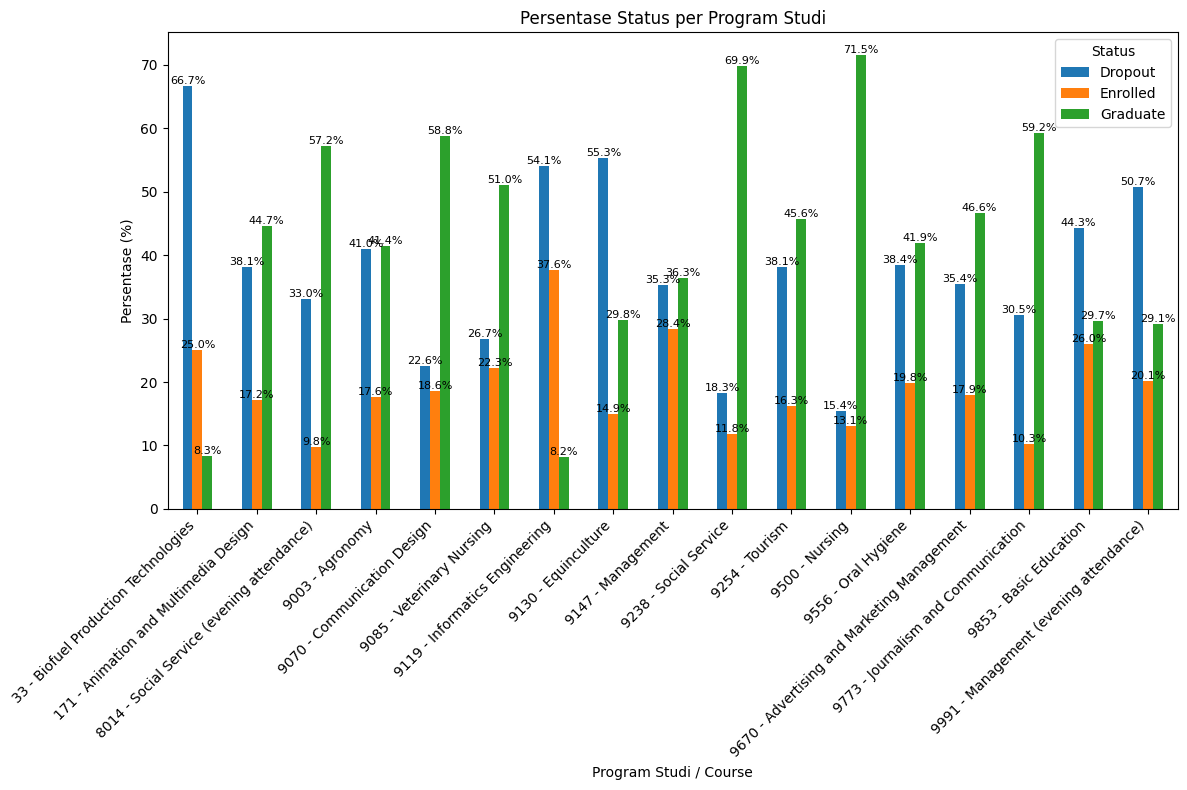

In [10]:
# Mapping dictionary: kode program ke nama jurusan
course_names = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}

# Membuat pivot table: kelompokkan data berdasarkan 'Course' dan hitung jumlah setiap status
course_status = df.groupby('Course')['Status'].value_counts().unstack(fill_value=0)

# Menghitung persentase dari setiap kategori per course
course_pct = course_status.div(course_status.sum(axis=1), axis=0) * 100

# Ubah index agar menampilkan kode dan nama jurusan
course_pct.index = course_pct.index.map(lambda x: f"{x} - {course_names.get(x, 'Unknown Course')}")

# Tampilkan tabel persentase secara tekstual
print("Tabel Persentase Status per Program Studi:")
print(course_pct)

# Membuat diagram batang (bar chart) untuk persentase per status
ax = course_pct.plot(kind='bar', figsize=(12, 8))
plt.title("Persentase Status per Program Studi")
plt.xlabel("Program Studi / Course")
plt.ylabel("Persentase (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')

# Menambahkan annotasi (persentase) pada setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()


In [11]:
# Simpan dataset hasil pembersihan (sebelum encoding dan scaling)
df.to_csv("dataset.csv", index=False)

## Data Preparation / Preprocessing

### konversi tipe data

Beberapa kolom yang sebenarnya berupa kategori (meskipun disimpan sebagai angka) sebaiknya diubah ke tipe data category agar lebih mudah diinterpretasikan dan diolah. Misalnya, kolom seperti Marital_status, Application_mode, Course, Gender, dan lain-lain

In [12]:
categorical_cols = ['Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance', 
                    'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 
                    'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs', 
                    'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 'Status']

for col in categorical_cols:
    df[col] = df[col].astype('category')

### Encoding Variabel Kategorikal
Target Encoding untuk Kolom Target: Misalnya, kamu ingin meng-encode kolom Status yang berisi tiga nilai: Graduate, Dropout, dan Enrolled. Kamu dapat membuat map sesuai dengan pemetaan yang kamu inginkan.

One-Hot Encoding untuk Fitur Lainnya: Gunakan pd.get_dummies() untuk mengubah fitur kategorikal menjadi dummy variable, terutama jika tidak ada hubungan ordinal antar kategori.

In [13]:
# Daftar kolom yang dianggap kategorikal, termasuk 'Status'
categorical_cols = [
    "Marital_status", "Application_mode", "Course", "Daytime_evening_attendance",
    "Previous_qualification", "Nacionality", "Mothers_qualification", "Fathers_qualification",
    "Mothers_occupation", "Fathers_occupation", "Displaced", "Educational_special_needs",
    "Debtor", "Tuition_fees_up_to_date", "Gender", "Scholarship_holder", "International", "Status"
]

# Konversi tiap kolom di atas ke tipe 'category'
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Lakukan one-hot encoding secara bersamaan untuk semua kolom kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Konversi hasil encoding agar bernilai integer 0/1, bukan boolean
df_encoded = df_encoded.astype(int)

# Tampilkan beberapa baris pertama dari DataFrame hasil encoding
print("DataFrame setelah encoding:")
display(df_encoded.head())


DataFrame setelah encoding:


,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,...,Fathers_occupation_195,Displaced_1,Educational_special_needs_1,Debtor_1,Tuition_fees_up_to_date_1,Gender_1,Scholarship_holder_1,International_1,Status_Enrolled,Status_Graduate
0,5,122,127,20,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,1,160,142,19,0,6,6,6,14,0,...,0,1,0,0,0,1,0,0,0,1
2,5,122,124,19,0,6,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,2,122,119,20,0,6,8,6,13,0,...,0,1,0,0,1,0,0,0,0,1
4,1,100,141,45,0,6,9,5,12,0,...,0,0,0,0,1,0,0,0,0,1


### scaling fitur numerik

In [14]:
numeric_features = [
    "Previous_qualification_grade", "Admission_grade",
    "Curricular_units_1st_sem_grade", "Curricular_units_2nd_sem_grade",
    "Unemployment_rate", "Inflation_rate", "GDP", "Age_at_enrollment"
]

scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

print(df_encoded)

      Application_order  Previous_qualification_grade  Admission_grade  \
0                     5                     -0.803909         0.024645   
1                     1                      2.077992         1.060374   
2                     5                     -0.803909        -0.182501   
3                     2                     -0.803909        -0.527745   
4                     1                     -2.472377         0.991326   
...                 ...                           ...              ...   
4419                  6                     -0.576390        -0.320599   
4420                  2                     -0.955588        -0.527745   
4421                  1                      1.622955         1.543715   
4422                  1                      3.594781         1.819910   
4423                  1                      1.471276         1.750861   

      Age_at_enrollment  Curricular_units_1st_sem_credited  \
0             -0.430363                          

## Modeling

In [15]:
target_mapping = {"Graduate": 0, "Dropout": 1, "Enrolled": 2}
y = df["Status"].map(target_mapping)

# Untuk fitur, kita gunakan DataFrame hasil encoding dan menghapus kolom dummy yang berasal dari Status.
cols_to_drop = [col for col in df_encoded.columns if col.startswith("Status_")]
X = df_encoded.drop(columns=cols_to_drop)

# Lakukan scaling pada fitur numerik (cuma fitur kontinu yang memang butuh distandarisasi).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi dataset menjadi training dan test set (dengan stratifikasi agar distribusi target konsisten)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Buat model Logistic Regression (contoh, dengan class_weight='balanced' jika distribusi kelas tidak seimbang)
model = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Prediksi terhadap test set
y_pred = model.predict(X_test)

# Evaluasi hasil model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7209039548022599
Confusion Matrix:
 [[342  30  70]
 [ 14 215  55]
 [ 43  35  81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81       442
           1       0.77      0.76      0.76       284
           2       0.39      0.51      0.44       159

    accuracy                           0.72       885
   macro avg       0.67      0.68      0.67       885
weighted avg       0.75      0.72      0.73       885



## Evaluation

### Hasil Evaluasi Model

Akurasi: 72.09%

Confusion Matrix:

[[342  30  70]
 [ 14 215  55]
 [ 43  35  81]]

Classification Report:

### Interpretasi:

Tujuan Bisnis: Model ini dikembangkan untuk memprediksi apakah seorang pelajar akan dropout (keluar) atau tidak. Dari tiga kelas yang ada, diasumsikan bahwa:

Kelas 0 mewakili pelajar yang lulus (Graduate).

Kelas 1 mewakili pelajar yang dropout.

Kelas 2 mewakili pelajar yang masih enrolled (aktif terdaftar).

Akurasi: Dengan akurasi sebesar 72.09%, model dapat mengklasifikasikan sekitar 72% data uji dengan benar. Meskipun angkanya belum mendekati sempurna, model ini sudah cukup memberikan gambaran awal tentang risiko dropout.

Kinerja untuk Kelas Dropout: Fokus utama dalam konteks bisnis adalah mendeteksi dropout (kelas 1).

Recall kelas 1 sebesar 0.76 menunjukkan bahwa model berhasil menangkap 76% kasus pelajar yang dropout, yang mengindikasikan sensitivitas yang cukup baik.

Precision kelas 1 sebesar 0.77 mengindikasikan bahwa dari semua prediksi dropout, 77% benar-benar dropout, meskipun masih terdapat false positive.

Perbandingan Kelas Lain: Kelas 0 (Graduate) mencapai f1-score 0.81, menandakan performa yang baik dalam mengidentifikasi pelajar yang lulus. Namun, kelas 2 (Enrolled) hanya memperoleh f1-score 0.44, yang bisa menjadi area untuk perbaikan, meskipun fokus utama model ini adalah mendeteksi dropout.

### Kesimpulan:

Model Logistic Regression ini sudah cukup baik sebagai alat bantu deteksi dini risiko dropout di kalangan pelajar. Dengan recall dropout sebesar 76%, model memungkinkan pihak kampus atau pengelola program untuk segera mengidentifikasi pelajar yang berisiko dan merancang strategi intervensi agar angka dropout dapat ditekan.

### Saran Perbaikan:

Eksplorasi teknik balancing data tambahan, misalnya SMOTE, untuk meningkatkan performa model terutama pada kelas dengan representasi data yang lebih sedikit.

Lakukan hyperparameter tuning atau eksperimen dengan model lain seperti Random Forest atau Gradient Boosting untuk mendapatkan hasil yang lebih optimal.

Gunakan hasil prediksi model ini sebagai salah satu komponen pendukung pengambilan keputusan, dengan tetap memperhatikan konteks dan faktor-faktor lain yang mungkin mempengaruhi dropout.

### membuat model

In [16]:
# Simpan model yang telah dilatih
joblib.dump(model, 'model_dropout.pkl')

# Simpan objek scaler yang digunakan untuk normalisasi fitur numerik
joblib.dump(scaler, 'scaler_dropout.pkl')

# Simpan urutan nama kolom fitur (agar fitur pada saat prediksi memiliki urutan yang sama)
fitur_model = list(X.columns)
joblib.dump(fitur_model, 'fitur_model_dropout.pkl')

print("Model, scaler, dan daftar fitur berhasil disimpan.")


Model, scaler, dan daftar fitur berhasil disimpan.
